In [3]:
# Loading Data 
import pandas as pd  
import numpy as np
from pathlib import Path
import seaborn as sns
import alpaca_trade_api as tradeapi

import matplotlib.pyplot as plt
%matplotlib inline
import os 
!pip install yfinance
!pip install quandl
from dotenv import load_dotenv
import yfinance as yf
import quandl

In [4]:
# Import Quandl API key
load_dotenv()
quandl_api_key = os.getenv("QUANDL_API_KEY")

In [5]:
# GDP from Quandl 
#gdp = quandl.get("FRED/GDP") 
#gdp.tail()

In [6]:
# Dow Jones Data from 2001
DJI = yf.Ticker("^DJI")
DJI_df = DJI.history(period="20y").reset_index()

In [7]:
DJI_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2001-04-02,9877.160156,9992.530273,9705.070312,9777.929688,237210000,0,0
1,2001-04-03,9774.780273,9774.780273,9428.070312,9485.709961,273290000,0,0
2,2001-04-04,9480.950195,9625.900391,9375.719727,9515.419922,301600000,0,0
3,2001-04-05,9527.209961,9929.790039,9527.209961,9918.049805,281710000,0,0
4,2001-04-06,9913.940430,9913.940430,9698.070312,9791.089844,270000000,0,0


In [8]:
# Cleaned Dow Data 
DJI_df = DJI_df[['Date','Close']].set_index("Date")

In [9]:
DJI_df.head()

,Close
Date,
2001-04-02,9777.929688
2001-04-03,9485.709961
2001-04-04,9515.419922
2001-04-05,9918.049805
2001-04-06,9791.089844


In [10]:
# Dow data described 
DJI_df.describe()

,Close
count,5032.000000
mean,15112.322480
std,6129.901006
min,6547.049805
25%,10456.947510
50%,12654.604980
75%,18001.237793
max,33171.371094


In [11]:
# Dow grouped by month
DJI_grp = DJI_df.groupby([DJI_df.index.year,DJI_df.index.month]).first()
DJI_grp

Close
Date Date              
2001 4      9777.929688
     5     10898.339844
     6     10990.410156
     7     10593.719727
     8     10510.009766
...                 ...
2020 12    29823.919922
2021 1     30223.890625
     2     30211.910156
     3     31535.509766
     4     33153.210938

[241 rows x 1 columns]

In [12]:
# Dow Month Percent Change 
month_percent_change = DJI_grp.pct_change().dropna()
month_percent_change = pd.DataFrame(month_percent_change)
month_percent_change.head()

Close
Date Date          
2001 5     0.114586
     6     0.008448
     7    -0.036094
     8    -0.007902
     9    -0.048765

In [13]:
# Dow Percent Change 
dow_percent_change = DJI_df.pct_change()
DJI_df['pct_change'] = dow_percent_change
DJI_df.dropna(inplace=True)


# Confidence Indicator on Dow

In [14]:
# Import confidence Data 
confidence_path = Path("data/one_year_confidence.csv")
confidence = pd.read_csv(confidence_path,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()

In [15]:
dow_pct_change_path = Path("data/Dow Pct Change.csv")
dow_pct_change = pd.read_csv(dow_pct_change_path,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()
dow_pct_change.head()

,Percent Change
Date,
2000-05-01,-0.020918
2000-06-01,-0.008902
2000-07-01,0.005988
2000-08-01,0.071131
2000-09-01,-0.051959


In [16]:
confidence.head()

,US Institutional,US Individual
Date,,
2021-02-01,62.12,75.00
2021-01-01,61.90,73.17
2020-12-01,61.54,69.17
2020-11-01,62.86,70.68
2020-10-01,67.61,70.71


In [17]:
confidence.describe()

,US Institutional,US Individual
count,241.000000,241.000000
mean,77.260996,76.539295
std,6.169238,8.461401
min,54.740000,59.750000
25%,74.030000,70.750000
50%,77.140000,75.820000
75%,80.950000,83.500000
max,92.590000,95.620000


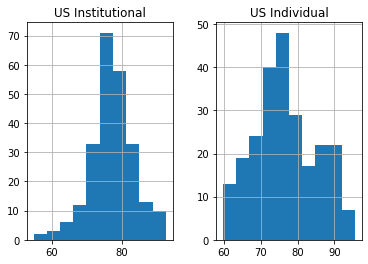

In [18]:
confidence_dist = confidence.hist()

In [19]:
# US Institutional data greater than 80%
upper_q = confidence.loc[confidence['US Institutional'] > 80].round(2)
upper_q.head()

,US Institutional,US Individual
Date,,
2020-07-01,80.95,73.61
2020-05-01,81.90,74.05
2020-04-01,80.99,75.00
2020-03-01,81.42,70.94
2014-09-01,82.17,64.97


<AxesSubplot:ylabel='Density'>

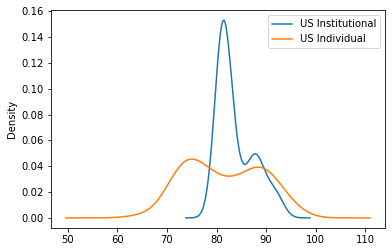

In [20]:
upper_q.plot.density()

array([[<AxesSubplot:title={'center':'US Institutional'}>,
        <AxesSubplot:title={'center':'US Individual'}>]], dtype=object)

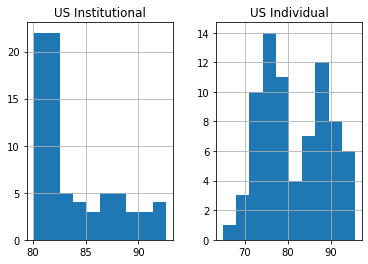

In [21]:
upper_q.hist()

<AxesSubplot:xlabel='Date', ylabel='[US Individual]'>

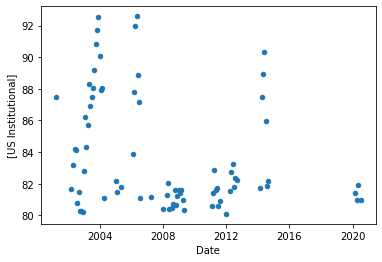

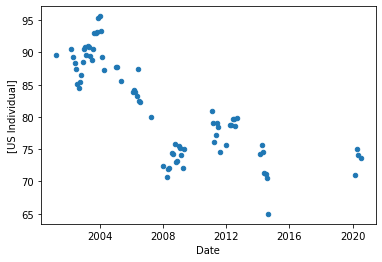

In [22]:
scatter_upper_q = upper_q.reset_index()
scatter_upper_q.plot.scatter(x='Date' , y=['US Institutional'])
scatter_upper_q.plot.scatter(x='Date' , y=['US Individual'])

#rolling_6 = 
#upper_q.rolling(window=6).mean().dropna()                       


In [23]:
#ax = rolling_6.plot(figsize = (10,5), title='Rolling 6 Month of Mean Confidence In The Upper Quartile of Confidence')

In [24]:
upper_q.corr()

,US Institutional,US Individual
US Institutional,1.000000,0.521777
US Individual,0.521777,1.000000


In [25]:
upper_q.head()

,US Institutional,US Individual
Date,,
2020-07-01,80.95,73.61
2020-05-01,81.90,74.05
2020-04-01,80.99,75.00
2020-03-01,81.42,70.94
2014-09-01,82.17,64.97


In [26]:
# US individual less than 70%
lower_q = confidence.loc[confidence['US Individual'] < 70].round(2)
lower_q.head()

,US Institutional,US Individual
Date,,
2020-12-01,61.54,69.17
2020-02-01,79.34,65.00
2020-01-01,72.17,64.35
2019-12-01,72.22,62.16
2019-11-01,70.09,63.96


<AxesSubplot:ylabel='Density'>

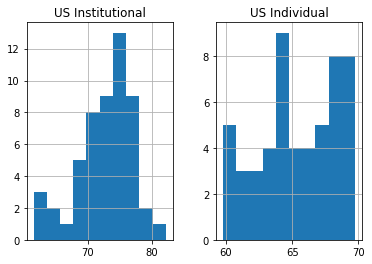

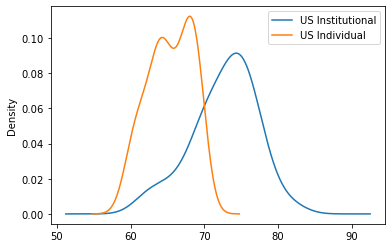

In [27]:
lower_q.hist()
lower_q.plot.density()

<AxesSubplot:xlabel='Date', ylabel='[US Individual]'>

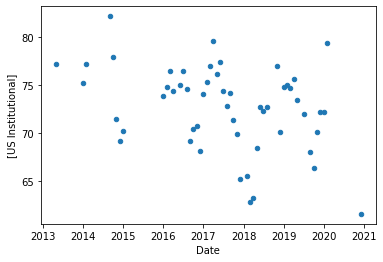

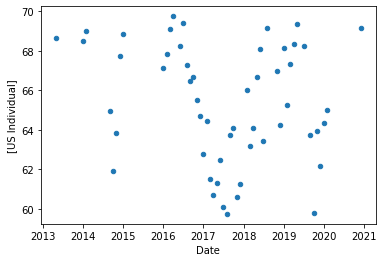

In [28]:
scatter_lower_q = lower_q.reset_index()
scatter_lower_q.plot.scatter(x='Date' , y=['US Institutional'])
scatter_lower_q.plot.scatter(x='Date' , y=['US Individual'])


#lower_rolling_6 = lower_q.rolling(window=6).mean().dropna()

In [29]:
#ax = lower_rolling_6.plot(figsize=(10,5), title='Rolling 6 Month of Mean Confidence In The Lower Quartile of Confidence')

In [30]:
lower_q.corr()

,US Institutional,US Individual
US Institutional,1.00000,0.08987
US Individual,0.08987,1.00000


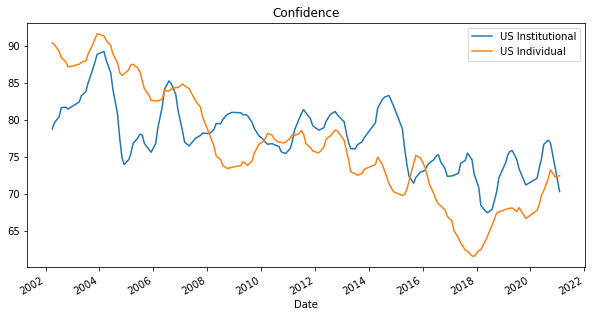

In [35]:
# Percent of Dow when individual confidence less than 70%
dow_and_confidence = pd.concat([DJI_df,confidence], axis=1, join='inner')
#dow_and_confidence[['US Institutional', "US Individual"]].plot(figsize=(10,5))
dow_and_confidence_rolling_us = dow_and_confidence[['US Institutional', "US Individual"]].rolling(window=6).mean().dropna()
ax = dow_and_confidence_rolling_us.plot(figsize=(10,5), title='Confidence')

<AxesSubplot:>

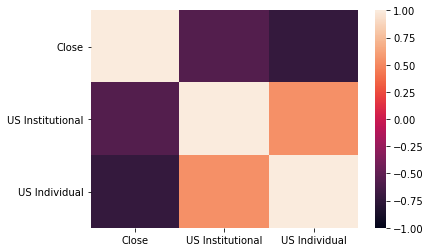

In [38]:
heatmap = dow_and_confidence[['Close', 'US Institutional', 'US Individual']].corr()
sns.heatmap(heatmap, vmin = -1, vmax = 1)

<AxesSubplot:xlabel='Date'>

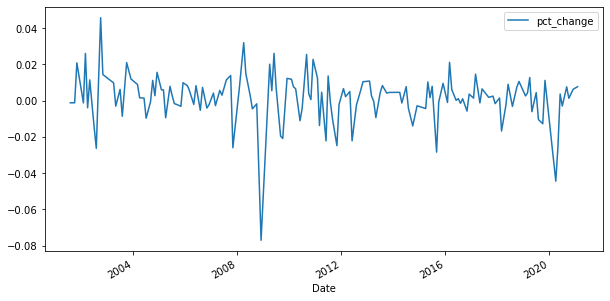

In [39]:
dow_and_confidence[['pct_change']].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

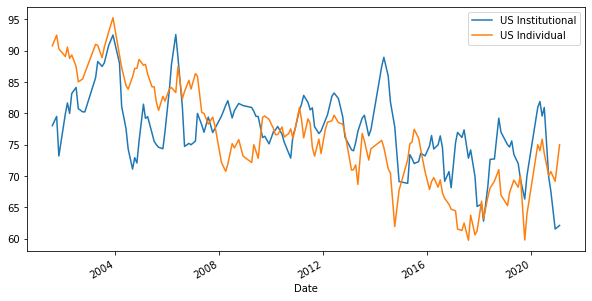

In [40]:
dow_and_confidence[['US Institutional', 'US Individual']].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

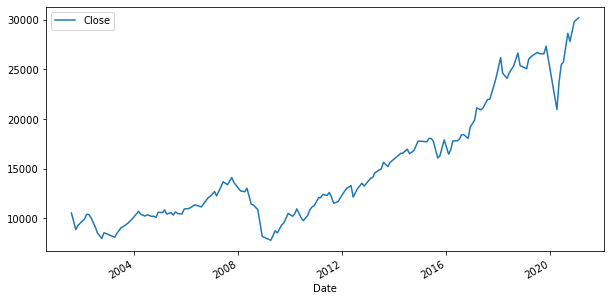

In [41]:
dow_and_confidence[['Close']].plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

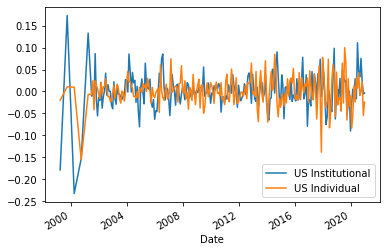

In [42]:
# Confidence percent change
confidence_pct_change = confidence.pct_change().dropna()
confidence_pct_change.plot()

In [49]:
dow_and_confidence_pct = dow_and_confidence[['Close', 'US Institutional', 'US Individual']].pct_change()

<AxesSubplot:>

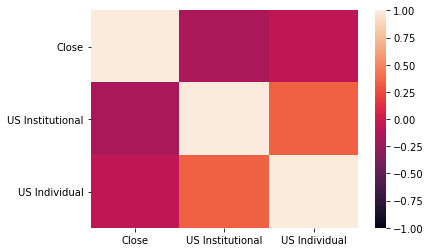

In [50]:
dow_corr = dow_and_confidence_pct.corr()
dow_corr
sns.heatmap(dow_corr,vmin=-1,vmax=1)

<AxesSubplot:ylabel='Density'>

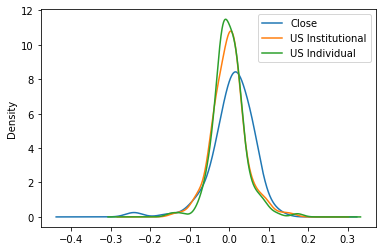

In [51]:
dow_and_confidence_pct.plot.density()

In [53]:
#valuation
valuation = Path("data/us_valuation_confidence_index.csv")
valuation = pd.read_csv(valuation,parse_dates=True, index_col='Date', infer_datetime_format=True).dropna()

In [54]:
valuation

,US Institutional,US Individual
Date,,
2021-02-01,42.70,29.51
2021-01-01,43.82,28.78
2020-12-01,44.68,31.47
2020-11-01,41.84,33.77
2020-10-01,46.39,34.16
...,...,...
2001-04-01,58.93,59.76
2000-10-01,53.57,55.77
2000-04-01,31.03,27.68


<AxesSubplot:xlabel='Date'>

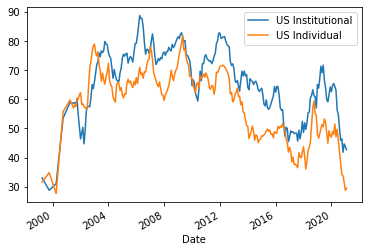

In [55]:
valuation.plot()

# Dow on Confidence Indicator

array([[<AxesSubplot:title={'center':'US Institutional'}>,
        <AxesSubplot:title={'center':'US Individual'}>]], dtype=object)

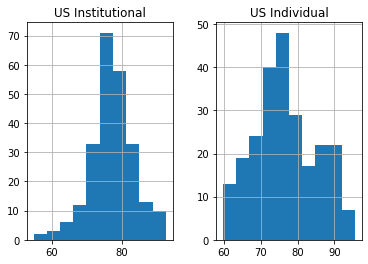

In [286]:
confidence.hist()

array([[<AxesSubplot:title={'center':'Percent Change'}>]], dtype=object)

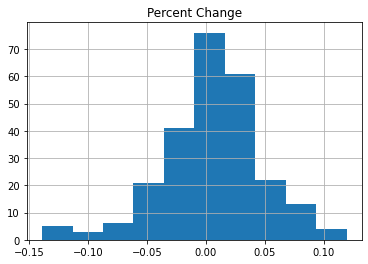

In [248]:
dow_pct_change.hist()

<AxesSubplot:xlabel='Date'>

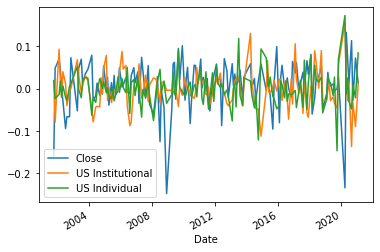

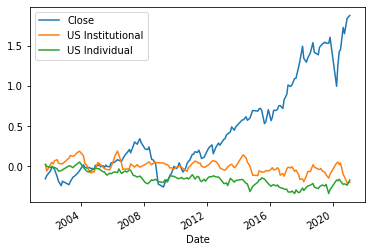

In [56]:
dow_and_confidence_pct.plot()
d_n_c_pct_cum = (1+dow_and_confidence_pct).cumprod() -1
d_n_c_pct_cum.plot()

# Crash Confidence Correct? 

In [257]:
# Import confidence Data (Percent of population that thinks market is not too high)
# High numnber indicates more bullish sentiment 
# Low number indicates bearish sentiment
crash = Path("data/us_crash_confidence.csv")
crash = pd.read_csv(valuation_confidence_path,parse_dates=True, index_col='Date', infer_datetime_format=True)

In [272]:
crash.head()

,US Institutional,US Individual
Date,,
2021-02-01,42.70,29.51
2021-01-01,43.82,28.78
2020-12-01,44.68,31.47
2020-11-01,41.84,33.77
2020-10-01,46.39,34.16


array([[<AxesSubplot:title={'center':'US Institutional'}>,
        <AxesSubplot:title={'center':'US Individual'}>]], dtype=object)

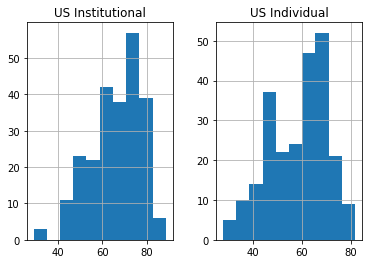

In [273]:
crash.hist()

<AxesSubplot:xlabel='Date'>

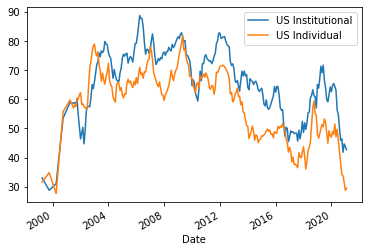

In [274]:
crash.plot()

In [261]:
crash.describe()

,US Institutional,US Individual
count,241.00000,241.000000
mean,66.38444,58.561867
std,11.46046,11.744502
min,28.79000,27.680000
25%,58.93000,48.950000
50%,66.67000,61.480000
75%,75.45000,67.680000
max,88.76000,81.820000


<AxesSubplot:xlabel='Date'>

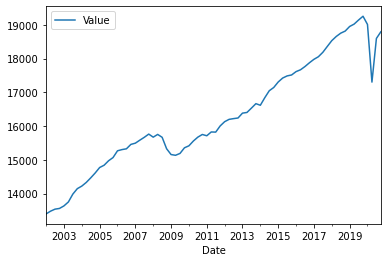

In [326]:
real_gdp = quandl.get("FRED/GDPC1", start_date='2002-01-01', end_date = '2021-02-01', collapse = 'monthly') 
real_gdp.plot()

<AxesSubplot:xlabel='Date'>

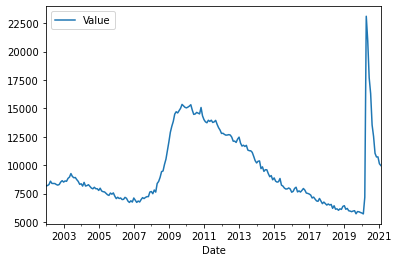

In [327]:
unemployment_level = quandl.get("FRED/UNEMPLOY", start_date='2002-01-01', end_date = '2021-02-01', collapse = 'monthly') 
unemployment_level.plot()

In [58]:
SandPComposite = quandl.get("YALE/SPCOMP", start_date='2002-01-01', end_date = '2021-02-01', collapse = 'monthly')
SandP_Percent = SandPComposite['S&P Composite'].pct_change()

In [61]:
SandPComposite

,S&P Composite,Dividend,Earnings,CPI,Long Interest Rate,Real Price,Real Dividend,Real Earnings,Cyclically Adjusted PE Ratio
Year,,,,,,,,,
2002-01-31,1140.210000,15.736667,24.693333,177.100,5.04,1689.474459,23.317368,36.588660,30.277204
2002-02-28,1100.670000,15.733333,24.696667,177.800,4.91,1624.466348,23.220648,36.449530,29.085704
2002-03-31,1153.790000,15.730000,24.700000,178.800,5.28,1693.341696,23.085886,36.250565,30.292131
2002-04-30,1111.930000,15.833333,25.380000,179.800,5.21,1622.830295,23.108301,37.041390,29.005883
2002-05-31,1079.250000,15.936667,26.060000,179.800,5.16,1575.134762,23.259113,38.033831,28.128108
...,...,...,...,...,...,...,...,...,...
2020-09-30,3365.516667,58.850000,98.220000,260.280,0.68,3393.097146,59.332277,99.024915,30.833593
2020-10-31,3418.701364,58.659615,95.007778,260.388,0.79,3445.288112,59.115803,95.746640,31.277783
2020-11-30,3548.992500,58.469231,93.233333,260.229,0.87,3578.777803,58.959940,94.015804,32.471647
